# Random Number Generation Techniques

In this lecture we will demonstrate two methods for generating random numbers from a given probability density function (pdf). The target distribution here is the standard Gaussian (Normal) distribution with mean 0 and standard deviation 1.

The two methods are:

1. **Pass/Fail (Accept–Reject) Method:**
   - We generate candidate samples uniformly over a chosen interval and then accept or reject each candidate based on the value of the pdf.

2. **CDF-Based (Inverse Transform) Method:**
   - We generate a uniform random number in [0,1] and use the inverse CDF (quantile function) of the target distribution to transform it into a sample from the desired pdf.

Let's get started!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

# For reproducibility
np.random.seed(42)



## Pass/Fail (Accept–Reject) Method

We first demonstrate the Pass/Fail method. In this method:

- We choose an interval \( [$x_{min}$, $x_{max}$] \) over which the target pdf is non-negligible.
- For each toy, we generate a candidate sample uniformly from \( [$x_{min}$, $x_{max}$] \).
- We also generate a uniform random number between 0 and \( M \) (where \( M \) is the maximum value of the pdf over the interval).
- The candidate is accepted if the uniform number is below the pdf evaluated at that candidate; otherwise it is rejected.

Below is the code for generating toys using this method.

In [7]:
# Parameters for the sampling
nsteps = 100
ntoys = 10000

x_min = -5.0
x_max = 5.0

x_vals = np.linspace(x_min, x_max, nsteps)
pdf_vals = norm.pdf(x_vals, 0, 1.0)

# Maximum value of the pdf in the interval
max_pdf = np.max(pdf_vals)
print("Max pdf value:", max_pdf)

# Perform Pass/Fail sampling
pass_fail_flags = np.array([])
uniform_candidates = np.random.uniform(x_min, x_max, size=ntoys)

for toy in uniform_candidates:
    test_val = np.random.uniform(0, max_pdf)
    if test_val > norm.pdf(toy, 0, 1.0):
        pass_fail_flags = np.append(pass_fail_flags, 0)  # reject
    else:
        pass_fail_flags = np.append(pass_fail_flags, 1)  # accept

# Select accepted samples
pf_samples = uniform_candidates[pass_fail_flags > 0]

Max pdf value: 0.39843380169134646


### Plotting the Pass/Fail Results

We now plot the histogram of the accepted samples against the true Gaussian pdf.

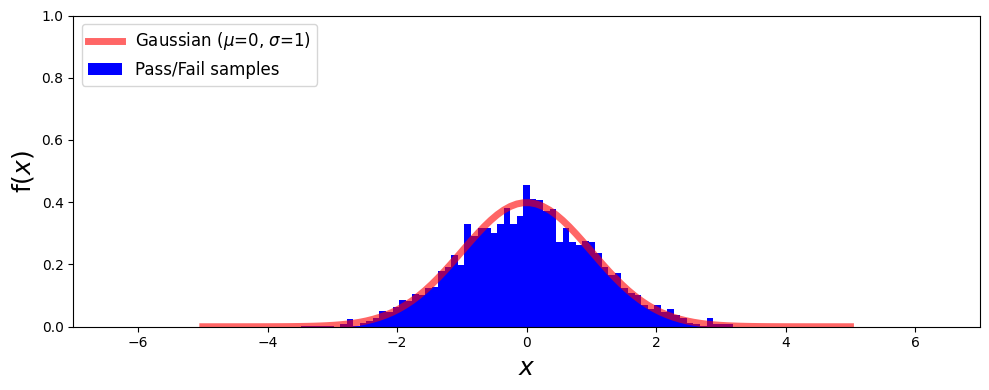

In [8]:
# Create a DataFrame for ease of histogramming
import pandas as pd

df_pf = pd.DataFrame(pf_samples, columns=['samples'])
dataCounts, dataBins = np.histogram(df_pf['samples'], bins=x_vals, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
widths = np.diff(dataBins)

fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("f($x$)", fontsize=18)

x_plot = np.linspace(x_min, x_max, 100)
ax.plot(x_plot, norm.pdf(x_plot, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'Gaussian ($\mu$=0, $\sigma$=1)')
plt.bar(binCentres, dataCounts, align='center', width=widths, label='Pass/Fail samples', color='b')

plt.xlim(-7, 7)
plt.ylim(0, 1)
ax.legend(loc='upper left', fontsize='large')

plt.show()
plt.close()

## CDF-Based (Inverse Transform) Method

The inverse transform method proceeds as follows:

1. Generate a uniform random number \( u \) in \( [0, 1] \).
2. Obtain the sample by computing \( x = F^{-1}(u) \), where \( F^{-1} \) is the inverse cumulative distribution function (CDF) of the target distribution.

For the Normal distribution, we can use the `ppf` (percent-point function) available in SciPy’s `norm` to serve as the inverse CDF. The code below generates samples using this method.

In [11]:
# Number of samples to generate using the CDF-based method
ntoys_cdf = 10000

# Generate uniform samples in [0, 1]
uniform_samples = np.random.uniform(0, 1, size=ntoys_cdf)

# Apply the inverse CDF (ppf) for the Normal distribution
cdf_samples = norm.ppf(uniform_samples, loc=0, scale=1)

### Plotting the CDF-Based Sampling Results

Let's compare the histogram of the samples generated using the inverse transform method to the target Gaussian pdf.

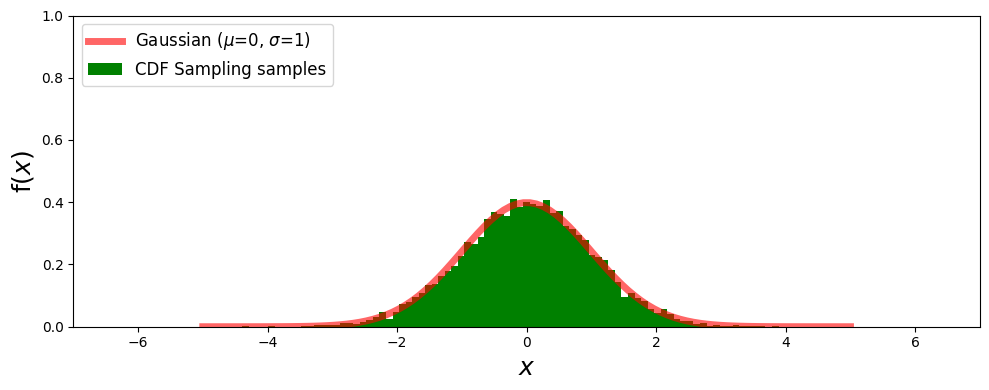

In [12]:
# Histogram and plot for CDF-based samples
df_cdf = pd.DataFrame(cdf_samples, columns=['samples'])
dataCounts_cdf, dataBins_cdf = np.histogram(df_cdf['samples'], bins=x_vals, density=True)
binCentres_cdf = (dataBins_cdf[:-1] + dataBins_cdf[1:]) / 2
widths_cdf = np.diff(dataBins_cdf)

fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("f($x$)", fontsize=18)

x_plot = np.linspace(x_min, x_max, 100)
ax.plot(x_plot, norm.pdf(x_plot, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'Gaussian ($\mu$=0, $\sigma$=1)')
plt.bar(binCentres_cdf, dataCounts_cdf, align='center', width=widths_cdf, label='CDF Sampling samples', color='g')

plt.xlim(-7, 7)
plt.ylim(0, 1)
ax.legend(loc='upper left', fontsize='large')

plt.show()
plt.close()

## Conclusion

In this lecture, we demonstrated two techniques for random number generation:

- **Pass/Fail (Accept–Reject) Method:**
  - Simple to implement but can be inefficient if the candidate distribution is very different from the target pdf.

- **CDF-Based (Inverse Transform) Method:**
  - Directly transforms uniformly distributed numbers into samples from the target distribution using the inverse CDF. The method requires an explicit expression for the inverse CDF. For many distributions, a closed-form inverse isn’t available, meaning you must resort to numerical approximations or alternative sampling methods.

## Because we can...

For no other reason than it's cool, let's make a video of the random number geneeration process converging to the desired distribution 

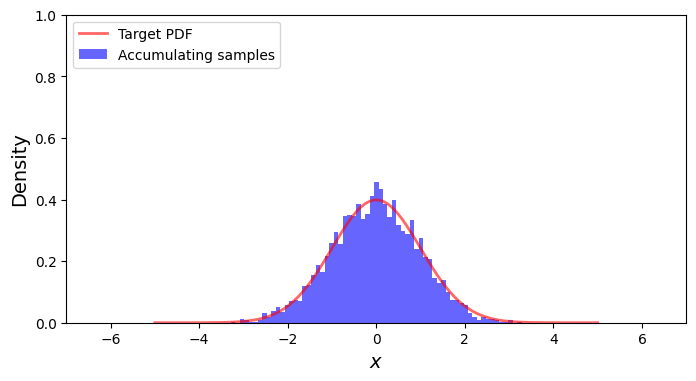

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-7, 7)
ax.set_ylim(0, 1)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
# Plot the target Gaussian pdf for reference
x_plot = np.linspace(x_min, x_max, 100)
ax.plot(x_plot, norm.pdf(x_plot, 0, 1.0), 'r-', lw=2, alpha=0.6, label='Target PDF')

# Compute bins from your original data
dataBins = np.linspace(x_min, x_max, nsteps)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
widths = np.diff(dataBins)
# Initialize an empty bar container
bars = ax.bar(binCentres, np.zeros_like(binCentres), width=widths, alpha=0.6, color='b', label='Accumulating samples')
ax.legend(loc='upper left')

# Function to update the histogram for each frame
def update(frame):
    # Use samples up to the current frame index
    current_samples = pf_samples[:frame]
    counts, _ = np.histogram(current_samples, bins=dataBins, density=True)
    # Update each bar's height
    for bar, h in zip(bars, counts):
        bar.set_height(h)
    return bars

# Create the animation; adjust the number of frames and interval as desired
frames = np.linspace(1, len(pf_samples), 100, dtype=int)
anim = animation.FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Display the animation inline (as an HTML5 video)
HTML(anim.to_jshtml())